In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/passwords/passwords.csv


In [2]:
import pandas as pd
# the alt rank is the same as the rank so let's drop it
df = pd.read_csv(filepath_or_buffer='/kaggle/input/passwords/passwords.csv', index_col=[0]).drop(columns=['rank_alt'])
df.head()

,password,category,value,time_unit,offline_crack_sec,strength,font_size
rank,,,,,,,
1.0,password,password-related,6.91,years,2.170000e+00,8.0,11.0
2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,4.0,8.0
3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,4.0,8.0
4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,8.0
5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,8.0,11.0


In [3]:
df.shape

(507, 7)

<Axes: ylabel='strength'>

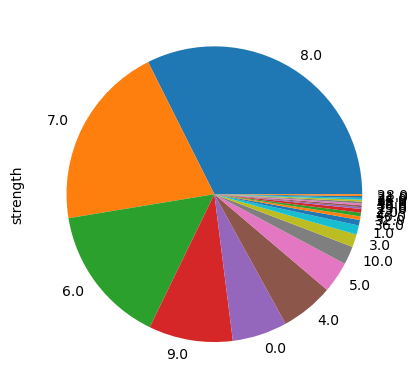

In [4]:
df['strength'].value_counts().plot(kind='pie')

Most of our passwords have single-digit strength.

<Axes: ylabel='category'>

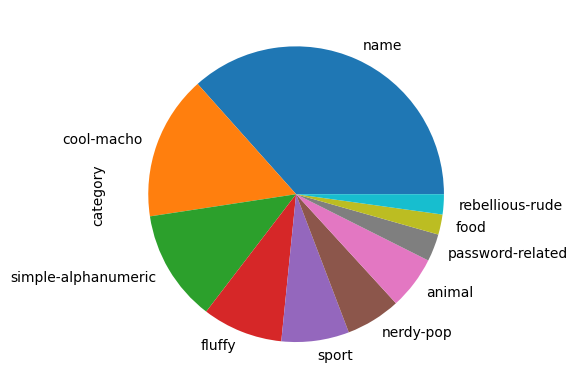

In [5]:
df['category'].value_counts().plot(kind='pie')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='strength', ylabel='font_size'>

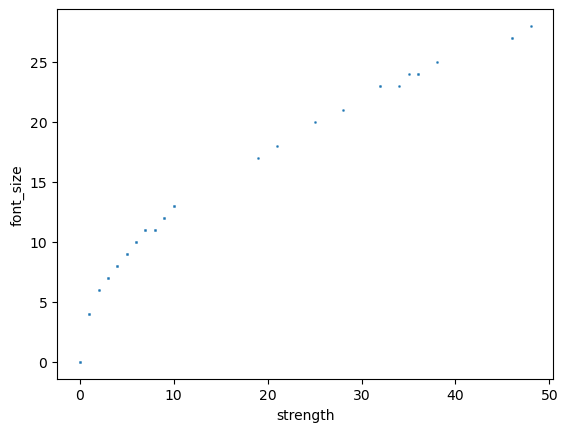

In [6]:
from seaborn import scatterplot
scatterplot(data=df, x='strength', y='font_size', s=4)

It looks like font size is a function of strength.

<Axes: xlabel='rank', ylabel='strength'>

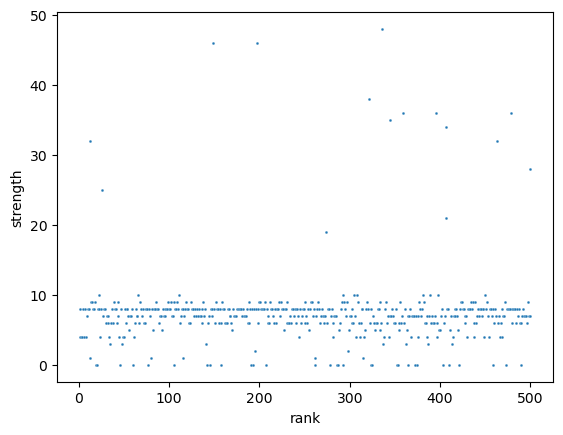

In [7]:
scatterplot(data=df, x='rank', y='strength', s=4)

We have two regimes: a small number of strong passwords and a large number of low-strength passwords.

In [8]:
df[df['strength'] > 15].sort_values(by='strength', ascending=False).head(n=10)

,password,category,value,time_unit,offline_crack_sec,strength,font_size
rank,,,,,,,
336.0,rush2112,nerdy-pop,92.27,years,29.020000,48.0,28.0
149.0,ncc1701,nerdy-pop,2.56,years,0.806000,46.0,27.0
197.0,thx1138,nerdy-pop,2.56,years,0.806000,46.0,27.0
321.0,bond007,nerdy-pop,2.56,years,0.806000,38.0,25.0
359.0,ou812,nerdy-pop,17.28,hours,0.000622,36.0,24.0
395.0,heka6w2,simple-alphanumeric,2.56,years,0.806000,36.0,24.0
478.0,test123,simple-alphanumeric,2.56,years,0.806000,36.0,24.0
344.0,red123,simple-alphanumeric,3.70,weeks,0.022400,35.0,24.0
406.0,jordan23,sport,92.27,years,29.270000,34.0,23.0


Let' look at the log of the cracking time so we can tell the easy passwords from the very easy passwords.

<Axes: xlabel='log10_sec', ylabel='strength'>

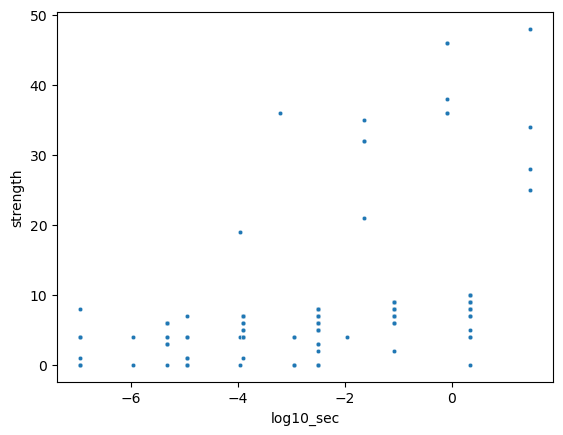

In [9]:
from math import log10
df['log10_sec'] = df['offline_crack_sec'].apply(log10)
scatterplot(data=df, x='log10_sec', y='strength', s=10)